In [1]:
import pandas as pd
from datetime import datetime
import datetime as dt
import numpy as np
import math  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [2]:
train=pd.read_csv("train.csv")
train1=train.copy()
target=train['Rented Bike Count']
train=train.drop(['Rented Bike Count'],axis=1)


In [3]:
test=pd.read_csv('test.csv')
test['Date'] = test['Date'].astype('object')
id=test['ID']
test=test.drop(['ID'],axis=1)
test.shape

(2760, 13)

In [4]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [5]:
df

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,ind
0,8/8/2018,0,29.1,77,2.1,1465,24.6,0.00,0.0,0.0,Summer,No Holiday,Yes,test
1,8/8/2018,1,28.5,80,1.5,1306,24.7,0.00,0.0,0.0,Summer,No Holiday,Yes,test
2,8/8/2018,2,28.3,84,2.1,1099,25.3,0.00,0.0,0.0,Summer,No Holiday,Yes,test
3,8/8/2018,3,28.3,84,0.5,1006,25.3,0.00,0.0,0.0,Summer,No Holiday,Yes,test
4,8/8/2018,4,28.0,85,1.0,1079,25.2,0.00,0.0,0.0,Summer,No Holiday,Yes,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,07/08/2018,19,32.9,56,2.6,1944,22.9,0.40,0.0,0.0,Summer,No Holiday,Yes,train
5996,07/08/2018,20,31.1,64,2.7,1770,23.4,0.02,0.0,0.0,Summer,No Holiday,Yes,train
5997,07/08/2018,21,30.3,69,2.2,1834,23.9,0.00,0.0,0.0,Summer,No Holiday,Yes,train
5998,07/08/2018,22,29.8,75,1.4,1609,24.8,0.00,0.0,0.0,Summer,No Holiday,Yes,train


In [6]:
#df.isnull().sum()

In [7]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [8]:
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day'],axis=1)

In [9]:
#train1.describe().T

In [10]:

from sklearn.preprocessing import OneHotEncoder
bike_df = df
col=[ 'Seasons', 'Holiday', 'Functioning Day']
ohe = OneHotEncoder()
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in col:
    df = one_hot_encoding(df, col)
df.head()       

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ind,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,29.1,77,2.1,1465,24.6,0.0,0.0,0.0,test,8,0,0,1,0,1,1
1,1,28.5,80,1.5,1306,24.7,0.0,0.0,0.0,test,8,0,0,1,0,1,1
2,2,28.3,84,2.1,1099,25.3,0.0,0.0,0.0,test,8,0,0,1,0,1,1
3,3,28.3,84,0.5,1006,25.3,0.0,0.0,0.0,test,8,0,0,1,0,1,1
4,4,28.0,85,1.0,1079,25.2,0.0,0.0,0.0,test,8,0,0,1,0,1,1


In [11]:
df['Visibility (10m)']=np.sqrt(df['Visibility (10m)'])


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#df['Holiday'] = labelencoder.fit_transform(df['Holiday'])
#df['Functioning Day']=labelencoder.fit_transform(df['Functioning Day'])

In [13]:
test=df[df['ind']=='test']
test=test.drop(['ind'],axis=1)

In [14]:
train_df=df[df['ind']=='train']
train_df=train_df.drop(['ind'],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
'''
nor=['Temperature(°C)' ,'Humidity(%)' ,'Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)']
#nor=['Visibility (10m)']
df_bike = train.copy()
for i in nor :
    df_bike[i] = StandardScaler().fit_transform(np.array(df_bike[i]).reshape(-1,1))
    test[i]=StandardScaler().fit_transform(np.array(df_bike[i]).reshape(-1,1))
df_bike.head()
df=df_bike.copy()
df
'''

"\nnor=['Temperature(°C)' ,'Humidity(%)' ,'Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)']\n#nor=['Visibility (10m)']\ndf_bike = train.copy()\nfor i in nor :\n    df_bike[i] = StandardScaler().fit_transform(np.array(df_bike[i]).reshape(-1,1))\n    test[i]=StandardScaler().fit_transform(np.array(df_bike[i]).reshape(-1,1))\ndf_bike.head()\ndf=df_bike.copy()\ndf\n"

In [16]:
test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,29.1,77,2.1,38.275318,24.6,0.0,0.0,0.0,8,0,0,1,0,1,1
1,1,28.5,80,1.5,36.138622,24.7,0.0,0.0,0.0,8,0,0,1,0,1,1
2,2,28.3,84,2.1,33.151169,25.3,0.0,0.0,0.0,8,0,0,1,0,1,1
3,3,28.3,84,0.5,31.717503,25.3,0.0,0.0,0.0,8,0,0,1,0,1,1
4,4,28.0,85,1.0,32.848135,25.2,0.0,0.0,0.0,8,0,0,1,0,1,1


C:\Users\oem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

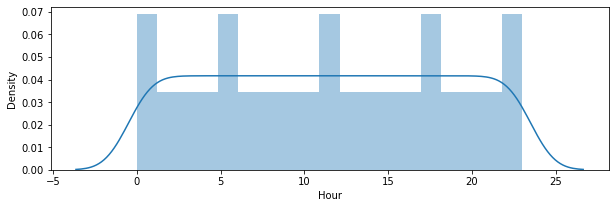

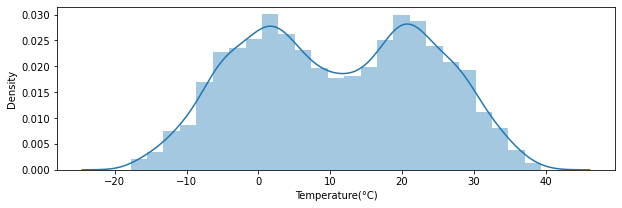

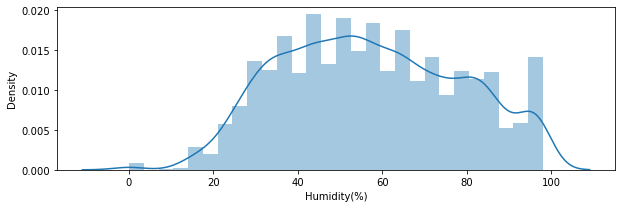

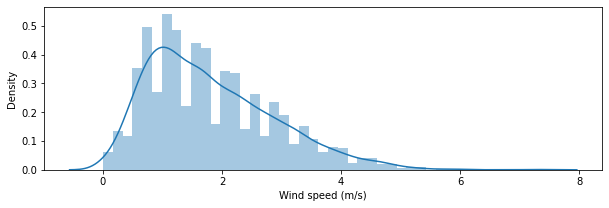

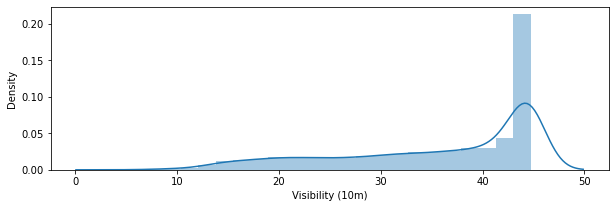

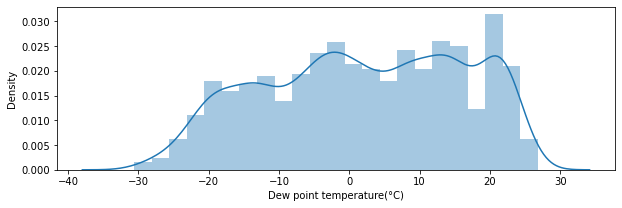

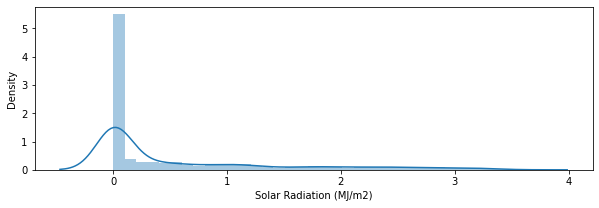

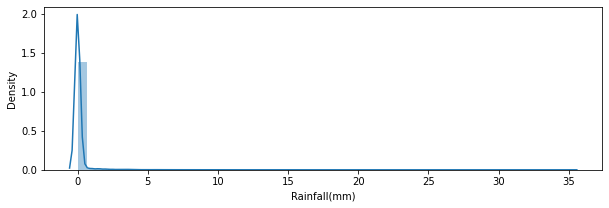

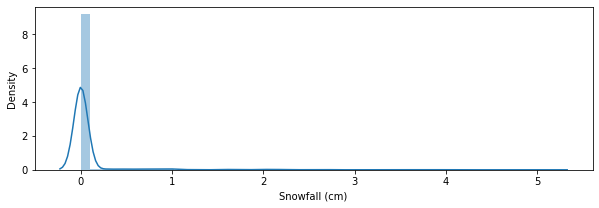

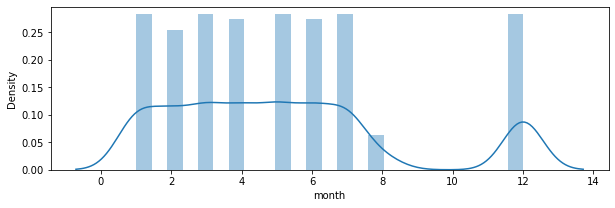

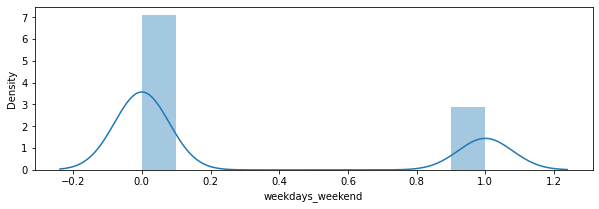

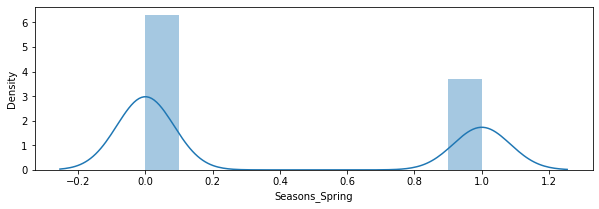

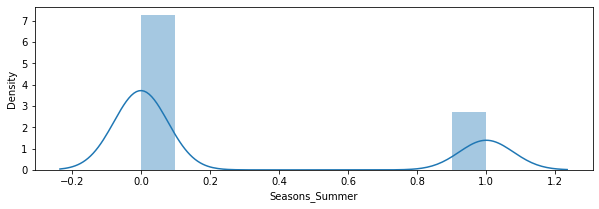

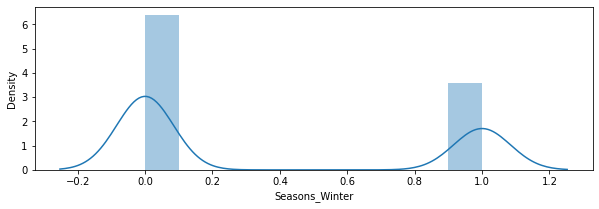

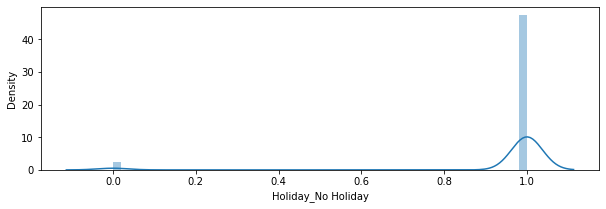

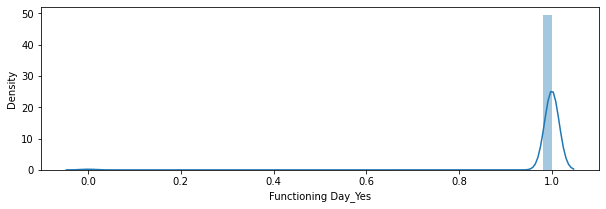

In [63]:
for col in train_df:
    plt.figure(figsize=(10,3))
    sns.distplot(x=train_df[col])
    plt.xlabel(col)
plt.show()

In [17]:
train_df.insert(2, "Rented Bike Count", target, True)

<AxesSubplot:>

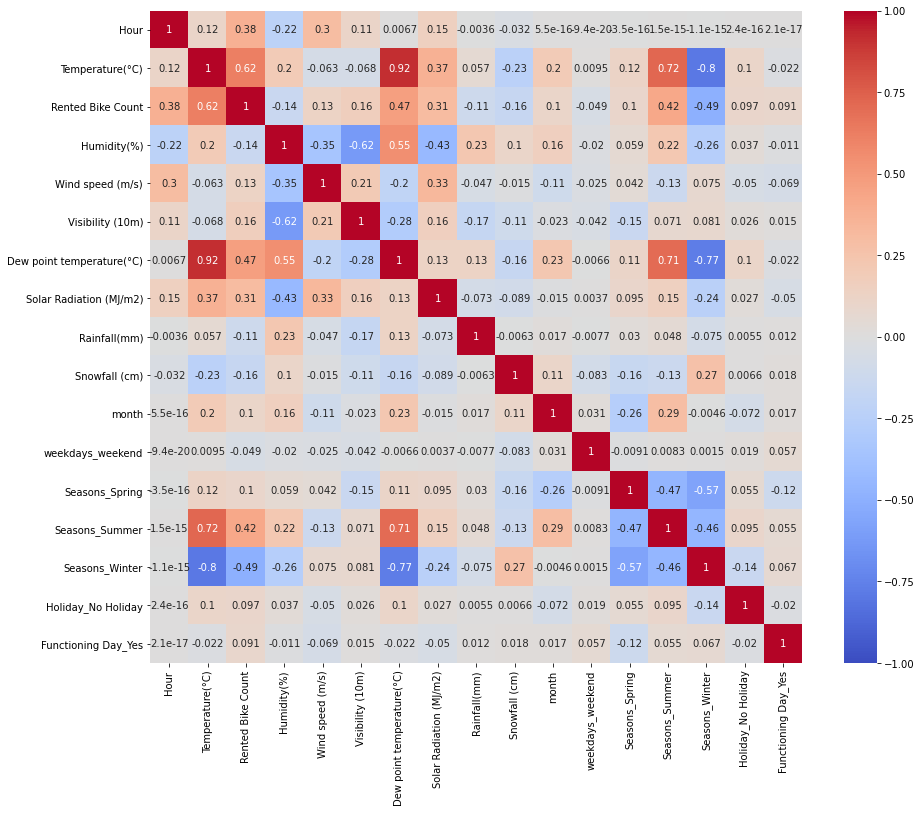

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(train_df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [19]:
x = train_df.drop(['Rented Bike Count'],axis=1)
y =np.sqrt(train_df['Rented Bike Count'])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [21]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
reg.score(x_train, y_train)*100
reg.score(x_test, y_test)*100


62.33774536641735

In [24]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test) 
reg.score(x_test, y_test)*100 
rms = mean_squared_error(y_pred_train, y_train)
rms

49.3749943996466

In [83]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(x_train,y_train)
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

rf_model.score(x_train, y_train)*100

99.08111494700185

In [252]:
rf_model.score(x_test, y_test)*100

92.83484635371994

In [254]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)
rms = mean_squared_error(y_pred_test, y_test)
rms

10.695333395655227

In [76]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_model, x_train, y_train, cv=5).mean())

0.9291944050201622


In [123]:
submission = pd.DataFrame(rf_model.predict(test))
submission.columns = ['Rented Bike Count']
submission['ID'] = id
submission = submission[['ID', 'Rented Bike Count']]
submission['Rented Bike Count'] =np.power(submission['Rented Bike Count']+1,2).astype(int)
#s=np.around(submission['Rented Bike Count'])
#submission['Rented Bike Count']=np.power(np.around(s)+1,2)
submission.head()

,ID,Rented Bike Count
0,0,877
1,1,578
2,2,513
3,3,353
4,4,254


In [124]:
submission.to_csv("submission_3.csv",index=False)

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3)
# evaluate model
model.fit(x_train, y_train)
#print(cross_val_score(rf_model, x_train, y_train, cv=3))# force scores to be positive


GradientBoostingRegressor()

In [259]:
model.score(x_train, y_train)*100
model.score(x_test, y_test)*100

88.97178358243161

In [264]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

12.81346881857509
16.461677888312853


In [213]:
submission = pd.DataFrame(model.predict(test))
submission.columns = ['Rented Bike Count']
submission['ID'] = id
submission = submission[['ID', 'Rented Bike Count']]
submission['Rented Bike Count'] =np.power(submission['Rented Bike Count'].astype(int)+1,2)
submission.head()

,ID,Rented Bike Count
0,0,784
1,1,676
2,2,441
3,3,361
4,4,324


In [48]:
submission.to_csv("submission_3.csv",index=False)

In [80]:
import catboost as ctb

model_CBR =ctb. CatBoostRegressor(iterations=1199,verbose=0 )
model_CBR.fit(x_train, y_train)
model_CBR.score(x_train, y_train)*100

97.90604368698538

In [267]:
print(model_CBR.score(x_train, y_train)*100)
print(model_CBR.score(x_test, y_test)*100)

97.90604368698538
94.86179808027187


In [268]:
y_pred_train=model_CBR.predict(x_train)
y_pred_test=model_CBR.predict(x_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

2.9910558629909145
7.669728424347059


In [192]:
submission = pd.DataFrame(model_CBR.predict(test))
submission.columns = ['Rented Bike Count']
submission['ID'] = id
submission = submission[['ID', 'Rented Bike Count']]
submission['Rented Bike Count'] =np.power(submission['Rented Bike Count']+2,2).astype(int)
#s=np.around(submission['Rented Bike Count'])
#submission['Rented Bike Count']=np.power(np.around(s)+1,2)
submission.head()

,ID,Rented Bike Count
0,0,929
1,1,702
2,2,503
3,3,355
4,4,254


In [193]:
submission.to_csv("submission_3.csv",index=False)

In [283]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=100,max_leaf_nodes=150) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)
regressor.score(x_train, y_train)*100

92.96698476852222

In [284]:
print(regressor.score(x_train, y_train)*100)
print(regressor.score(x_test, y_test)*100)

92.96698476852222
88.25336879402913


In [285]:
y_pred_train=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

10.046122410419688
17.534046473503302


In [ ]:
submission = pd.DataFrame(regressor.predict(test))
submission.columns = ['Rented Bike Count']
submission['ID'] = id
submission = submission[['ID', 'Rented Bike Count']]
submission['Rented Bike Count'] =np.power(submission['Rented Bike Count']+1,2).astype(int)
#s=np.around(submission['Rented Bike Count'])
#submission['Rented Bike Count']=np.power(np.around(s)+1,2)
submission.head()

In [ ]:
submission.to_csv("submission_3.csv",index=False)

In [287]:
import xgboost as xg
xgb_r = xg.XGBRegressor()
  
# Fitting the model
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [288]:
print(xgb_r.score(x_train, y_train)*100)
print(xgb_r.score(x_test, y_test)*100)

99.24044545990579
94.38786889642189


In [289]:
y_pred_train=xgb_r.predict(x_train)
y_pred_test=xgb_r.predict(x_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

1.0849653578203773
8.377156468104076


In [196]:
submission = pd.DataFrame(xgb_r.predict(test))
submission.columns = ['Rented Bike Count']
submission['ID'] = id
submission = submission[['ID', 'Rented Bike Count']]
submission['Rented Bike Count'] =np.power(submission['Rented Bike Count']+1,2).astype(int)
#s=np.around(submission['Rented Bike Count'])
#submission['Rented Bike Count']=np.power(np.around(s)+1,2)
submission.head()

,ID,Rented Bike Count
0,0,885
1,1,614
2,2,498
3,3,372
4,4,252


In [179]:
submission.to_csv("submission_3.csv",index=False)

In [291]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#DTR=DecisionTreeRegressor(max_depth=50)
RegModel = AdaBoostRegressor()
 
#Printing all the parameters of Adaboost

 
#Creating the model on Training Data
RegModel.fit(x_train,y_train)

AdaBoostRegressor()


AdaBoostRegressor()

In [292]:
print(RegModel.score(x_train, y_train)*100)
print(RegModel.score(x_test, y_test)*100)

74.83302138779268
73.52801408570797


In [293]:
y_pred_train=RegModel.predict(x_train)
y_pred_test=RegModel.predict(x_test)
rms = mean_squared_error(y_pred_train, y_train)
rms1 = mean_squared_error(y_pred_test, y_test)
print(rms)
print(rms1)

35.949097153529706
39.51439550014867


In [198]:
submission = pd.DataFrame(AB.predict(test))
submission.columns = ['Rented Bike Count']
submission['ID'] = id
submission = submission[['ID', 'Rented Bike Count']]
submission['Rented Bike Count'] =np.power(submission['Rented Bike Count']+1,2).astype(int)
#s=np.around(submission['Rented Bike Count'])
#submission['Rented Bike Count']=np.power(np.around(s)+1,2)
submission.head()

,ID,Rented Bike Count
0,0,743
1,1,743
2,2,620
3,3,526
4,4,526


In [223]:
submission.to_csv("submission_3.csv",index=False)